##MAC0417 - Visão e Processamento de Imagens - EP1
Nome: Eike Souza da Silva
NUSP: 4618653

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [3]:
!git clone https://github.com/eike012/mac0417.git

Cloning into 'mac0417'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 69 (delta 3), reused 27 (delta 2), pack-reused 40
Receiving objects: 100% (69/69), 135.15 MiB | 40.72 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
def df_size(path: str) -> float:
  tot = 0

  for arq in os.listdir(path):
    file_path = os.path.join(path, arq)

    file_size = os.path.getsize(file_path)

    tot += file_size

  in_mb = tot/(1024 * 1024)

  return in_mb

def summary_table(dataframe: object, path: str):

  base_imgs_size = df_size(path)

  class_names = list(set(dataframe['classe']))
  nclass = len(class_names)
  nimgs = len(list(dataframe['nome']))

  img = plt.imread(path + "/1.jpg")
  height, width, _ = img.shape

  print("==============================================")
  print("Tabela Global Sumária: ")
  print(f"  *  ", end="")
  print(f"Nome das classes: ", end="")
  for _class in class_names:
    print(f"{_class}, ", end="")
  print(f" ")
  print(f"  *  Número de classes: {nclass};")
  print(f"  *  Número de imagens: {nimgs};")
  print(f"  *  Tamanho da base (bytes): {round(base_imgs_size)}MB;")
  print(f"  *  Resolução das imagens: {height} linhas por {width} colunas;")
  print("==============================================")

In [5]:
df = pd.read_csv("/content/mac0417/EP1/ep1.csv")

In [ ]:
summary_table(df, "/content/mac0417/EP1/imgs")


Tabela Global Sumária: 
  *  Nome das classes: diario, hidratante, celular, tesoura, repelente, cremedental, estojo, oculos, tenis, guardachuva, caneca, caderno, carteira, garrafa1, fone, livro, notebook, quadrinho, desodorante, fiodental, garrafa2, bola, prestobarba, colher, joystick, controleremoto,  livro,  
  *  Número de classes: 27;
  *  Número de imagens: 36;
  *  Tamanho da base (bytes): 135MB;
  *  Resolução das imagens: 3120 linhas por 4160 colunas;


##Tabela detalhada por classe

In [42]:
detailed_table = pd.read_csv("/content/mac0417/EP1/tabela.csv")
detailed_table

Nome da classe Numero de objetos           Variações de Fundo  \
0              Bola                 3         3(bege cinza marrom)   
1          Joystick                 3        3(branco bege marrom)   
2           Garrafa             3 a 4        3(branco bege marrom)   
3            Caneca                 3         3(bege cinza marrom)   
4           Caderno                 3         3(bege cinza marrom)   
5      Guarda-chuva                 4        3(bege branco marrom)   
6             Livro                 4  4(marrom bege cinza branco)   
7            Estojo                 3        3(branco bege marrom)   
8       Desodorante             3 a 4        3(branco bege marrom)   
9         Fiodental                 3        3(branco bege marrom)   
10      Prestobarba                 3        3(branco bege marrom)   
11           Colher                 4  4(marrom bege cinza branco)   
12          Tesoura             3 a 4        3(branco bege marrom)   
13         Notebook                 3             2(marrom branco)   
14     Creme dental                 4        3(bege branco marrom)   
15           Diario                 3        3(branco bege marrom)   
16  Controle-remoto                 3        3(branco bege marrom)   
17        Quadrinho                 3        3(branco bege marrom)   
18             Fone                 3             2(marrom branco)   
19           Oculos                 3        3(branco bege marrom)   
20          Celular                 3        3(branco bege marrom)   
21         Carteira                 4        3(bege branco marrom)   
22            Tenis                 3        3(branco bege marrom)   
23       Hidratante                 3        3(branco bege marrom)   
24        Repelente                 3        3(branco bege marrom)   

     Número de Repetições  Total de amostras  
0                       3                  4  
1                       3                  4  
2                       3                  8  
3                       3                  4  
4                       3                  4  
5                       3                  4  
6                       3                  4  
7                       3                  4  
8                       3                  8  
9                       3                  4  
10                      3                  4  
11                      3                  4  
12                      3                  8  
13                      3                  4  
14                      3                  4  
15                      3                  4  
16                      3                  4  
17                      3                  4  
18                      3                  4  
19                      3                  4  
20                      3                  4  
21                      3                  4  
22                      3                  4  
23                      3                  4  
24                      3                  4

##Exibe imagem de cada classe

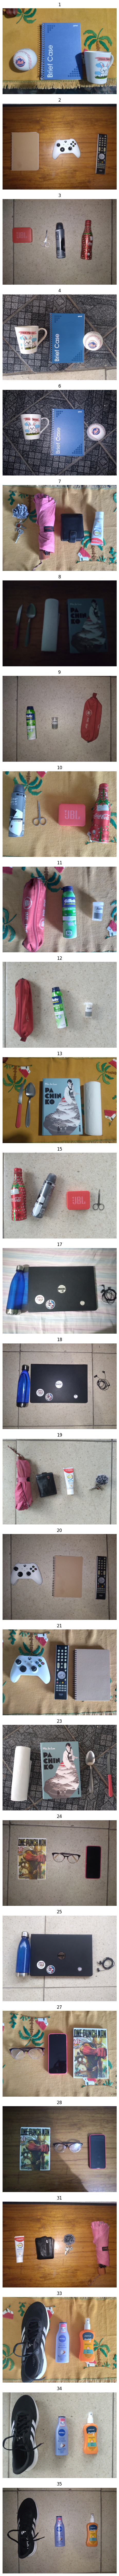

In [40]:
unique_names = df.drop_duplicates("classe")["nome"]

folder_path = "/content/mac0417/EP1/imgs"


fig = plt.figure(figsize=(50, 100))

for idx, name in enumerate(unique_names, start=1):
    img_path = os.path.join(folder_path, str(name) + ".jpg")

    img = mpimg.imread(img_path)

    ax = fig.add_subplot(len(unique_names), 1, idx)

    ax.imshow(img)
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()
